In [82]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df=pd.read_csv("../data/dairy_cows.csv")
df.head() 

,ID,Species,Animal_Class,Welfare_Hazards_Animal,Welfare_Hazards_Consequences,Welfare_Hazards_Impact,Ease_of_Hazard_Mitigation,Welfare_Indicator,Indicator_Ease,Indicator_Resources
0,1,Dairy cows,Tie stalls,Pasture access,Gastro-enteric disorders,High,Moderate,Abdominal discomfort,Moderate,Low
1,1,Dairy cows,Cubicles,Pasture access,Gastro-enteric disorders,High,Moderate,Abdominal discomfort,Moderate,Low
2,2,Dairy cows,Tie stalls,Continuous housing for long periods,General disruption of behaviour,Low,Difficult,Agonistic behaviour,Moderate,Low
3,2,Dairy cows,Cubicles,Continuous housing for long periods,General disruption of behaviour,Low,Difficult,Agonistic behaviour,Moderate,Low
4,3,Dairy cows,Tie stalls,Insufficient space,Restriction of movement,High,Moderate,Agonistic interactions,Moderate,Medium


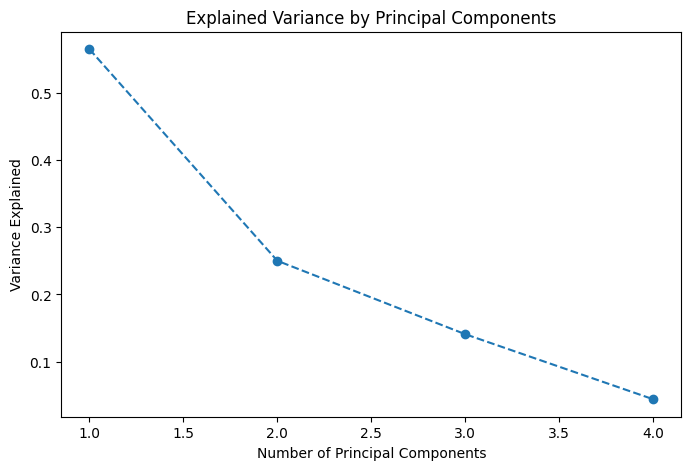

In [84]:
# Apply the mappings and transformations as per the user's instructions
hazard_map = {
    'Underfeeding': 'H_FN', 'Poor pasture quality': 'H_FN', 'Poor quality feed (low nutritive value)': 'H_FN',
    'Poor quality feed (pathogens/toxins)': 'H_FN', 'Too few feeding places ': 'H_FN', 'Too few feeding places indoors': 'H_FN',
    'Insufficient access to water (broken system, poor management)': 'H_FN',
    'Insufficient access to water (inappropriate system design)': 'H_FN',
    'Insufficient space': 'H_HE', 'Poor cubicle design': 'H_HE', 'Poor stall design / stall too small': 'H_HE',
    'Inadequate bedding (cubicle/stall floor)': 'H_HE', 'Fewer cubicles than cows': 'H_HE',
    'Inadequate flooring in passageways, feeding and milking areas': 'H_HE', 'Continuous housing for long periods': 'H_HE',
    'Inadequate maintenance of housing': 'H_HE', 'Insufficient protection from weather': 'H_HE',
    'Excessive noise (constant or sudden)': 'H_HE', 'Lack of environmental enrichment': 'H_HE',
    'Inadequate design of waiting area (size, flooring, crowding gates)': 'H_HE', 'Being tied up temporarily': 'H_HE',
    'Being tied without exercise for long periods ': 'H_HE', 'Use of cow trainers': 'H_HE',
    'Inadequate milking parlour design': 'H_HE', 'Inadequate milking robot design': 'H_HE',
    'Lack of space for exercise and social interactions': 'H_HE', 'Poor calving conditions (pen design)': 'H_HE',
    'Poor calving conditions (absence of pen)': 'H_HE', 'Inadequate housing design': 'H_HE',
    'Early separation of cow and calf': 'H_MH', 'Early separation of cow and calf (after 24h)': 'H_MH',
    'Mixing animals from different groups ': 'H_MH', 'Lack of facilities for sick animals': 'H_MH',
    'Milking robot breakdown': 'H_MH', 'Milking robot not used by cow': 'H_MH', 'Inadequate milking equipment': 'H_MH',
    'Lack of handling/restraining facilities': 'H_MH', 'Poor calving conditions (calving management)': 'H_MH',
    'Delayed calving intervention': 'H_MH', 'Difficulty calving because of the sire': 'H_MH', 'Pasture access': 'H_MH'
}
consequence_map = {
    'Mastitis': 'C_HD', 'Locomotor disorders (including lameness)': 'C_HD', 'Metabolic disorders': 'C_HD',
    'Soft tissue lesions and integument damage': 'C_HD', 'Skin disorders (other than soft tissue lesions and integument damage)': 'C_HD',
    'Bone lesions (incl. fractures and dislocations)': 'C_HD', 'Gastro-enteric disorders': 'C_HD',
    'Reproductive disorders': 'C_HD', 'Teat disorders': 'C_HD', 'Injuries': 'C_HD',
    'General disruption of behaviour': 'C_BW', 'Inability to perform comfort behaviour': 'C_BW',
    'Restriction of movement': 'C_BW', 'Resting problems': 'C_BW', 'Impaired maintenance behaviour': 'C_BW',
    'Impaired social behaviour': 'C_BW', 'Prolonged hunger': 'C_BW', 'Inability to chew and/or ruminate': 'C_BW',
    'Time budgets (disruption of behaviour)': 'C_BW', 'Time budgets (lack of rest)': 'C_BW',
    'Time budgets (prevention of behaviour)': 'C_BW', 'Time budgets (reduced behavioural repertoire)': 'C_BW',
    'Frequency of lying bouts': 'C_BW', 'Duration of lying down movement': 'C_BW',
    'Deviation from normal, uninterrupted getting up movement': 'C_BW',
    'Separation stress': 'C_SR', 'Environmental stress': 'C_SR', 'Group (social) stress': 'C_SR',
    'Handling stress': 'C_SR', 'Heat stress': 'C_SR', 'Cold stress': 'C_SR', 'Isolation stress': 'C_SR',
    'Mortality': 'C_M'
}
indicator_map = {
    'Milk somatic cell count (bulk or individual)': 'I_HP', 'Hot, red, painful udder': 'I_HP',
    'Distended udder': 'I_HP', 'Metabolic disorders': 'I_HP', 'Hock alterations': 'I_HP', 'Knee alterations': 'I_HP',
    'Lesions of the claw': 'I_HP', 'Neck injuries': 'I_HP', 'Teat disorders': 'I_HP', 'Disease': 'I_HP',
    'Body condition scoring': 'I_HP', 'Physiological stress indicators': 'I_HP', 'Respiratory rate and panting ': 'I_HP',
    'Abdominal discomfort': 'I_BW', 'Agonistic behaviour': 'I_BW', 'Agonistic interactions': 'I_BW',
    'Allo-grooming': 'I_BW', 'Altered resting posture': 'I_BW', 'Amount of eye white': 'I_BW',
    'Brush use': 'I_BW', 'Calving behaviour (difficult/long calving)': 'I_BW',
    'Calving records (death of cow)': 'I_BW', 'Calving records (difficulty calving)': 'I_BW',
    'Calving records (duration of calving)': 'I_BW', 'Coat condiition / cleanliness': 'I_BW',
    'Cow Pain Scale (attention towards surroundings, head position, ear position, facial expression, response to approach, back position, lameness)': 'I_BW',
    'Deviation from normal, uninterrupted getting up movement': 'I_BW',
    'Duration of lying down movement': 'I_BW', 'Frequency of lying bouts': 'I_BW', 'Gait assessment': 'I_BW',
    'Huddling': 'I_BW', 'Impaired calving behavour': 'I_BW', 'Impaired maintenance behaviour': 'I_BW',
    'Impaired social behaviour': 'I_BW', 'Increased standing': 'I_BW', 'Injuries': 'I_BW',
    'Lying behaviour synchronisation': 'I_BW', 'Lying time': 'I_BW', 'Self-grooming': 'I_BW',
    'Shivering': 'I_BW', 'Speed': 'I_BW', 'Step activity': 'I_BW', 'Sunburn injury': 'I_BW',
    'Time budgets (disruption of behaviour)': 'I_BW', 'Time budgets (increased standing, decreased lying)': 'I_BW',
    'Time budgets (lack of rest)': 'I_BW', 'Time budgets (prevention of behaviour)': 'I_BW',
    'Time budgets (reduced behavioural repertoire)': 'I_BW', 'Time spent looking out of pen': 'I_BW',
    'Vocalisations  ': 'I_BW', 'Walking distance': 'I_BW', 'Weight loss (adults) or restricted weight gain (calves)': 'I_BW'
}
impact_map = {'High': 3, 'Moderate': 2, 'Low': 1}
ease_map = {'Difficult': 1, 'Moderate': 2, 'Easy': 3}
resources_map = {'High': 3, 'Medium': 2, 'Low': 1}

df['Hazard_Category'] = df['Welfare_Hazards_Animal'].map(hazard_map)
df['Consequence_Category'] = df['Welfare_Hazards_Consequences'].map(consequence_map)
df['Indicator_Category'] = df['Welfare_Indicator'].map(indicator_map)
df['Welfare_Hazards_Impact'] = df['Welfare_Hazards_Impact'].map(impact_map)
df['Ease_of_Hazard_Mitigation'] = df['Ease_of_Hazard_Mitigation'].map(ease_map)
df['Indicator_Ease'] = df['Indicator_Ease'].map(ease_map)
df['Indicator_Resources'] = df['Indicator_Resources'].map(resources_map)

# Selecting numerical columns for PCA
numerical_columns = ['Welfare_Hazards_Impact', 'Ease_of_Hazard_Mitigation', 'Indicator_Ease', 'Indicator_Resources']
df_numerical = df[numerical_columns]

# Standardizing data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Performing PCA
pca = PCA()
pca_result = pca.fit_transform(df_scaled)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))])

# Adding explained variance ratio for analysis
explained_variance = pca.explained_variance_ratio_

# Plotting explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()


In [91]:
df

,ID,Species,Animal_Class,Welfare_Hazards_Animal,Welfare_Hazards_Consequences,Welfare_Hazards_Impact,Ease_of_Hazard_Mitigation,Welfare_Indicator,Indicator_Ease,Indicator_Resources,Hazard_H_FN,Hazard_H_HE,Hazard_H_MH,Consequence_C_BW,Consequence_C_HD,Consequence_C_M,Consequence_C_SR,Indicator_I_BW,Indicator_I_HP
0,1,Dairy cows,Tie stalls,Pasture access,Gastro-enteric disorders,3,2,Abdominal discomfort,2,1,False,False,True,False,True,False,False,True,False
1,1,Dairy cows,Cubicles,Pasture access,Gastro-enteric disorders,3,2,Abdominal discomfort,2,1,False,False,True,False,True,False,False,True,False
2,2,Dairy cows,Tie stalls,Continuous housing for long periods,General disruption of behaviour,1,1,Agonistic behaviour,2,1,False,True,False,True,False,False,False,True,False
3,2,Dairy cows,Cubicles,Continuous housing for long periods,General disruption of behaviour,1,1,Agonistic behaviour,2,1,False,True,False,True,False,False,False,True,False
4,3,Dairy cows,Tie stalls,Insufficient space,Restriction of movement,3,2,Agonistic interactions,2,2,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,192,Dairy cows,Tie stalls,Early separation of cow and calf (after 24h),Separation stress,3,3,Vocalisations,2,2,False,False,True,False,False,False,True,True,False
384,193,Dairy cows,Cubicles,Insufficient space,Restriction of movement,3,2,Walking distance,1,3,False,True,False,True,False,False,False,True,False
385,193,Dairy cows,Tie stalls,Insufficient space,Restriction of movement,3,2,Walking distance,1,3,False,True,False,True,False,False,False,True,False
386,194,Dairy cows,Cubicles,Pasture access,Gastro-enteric disorders,3,2,Weight loss (adults) or restricted weight gain...,3,1,False,False,True,False,True,False,False,True,False


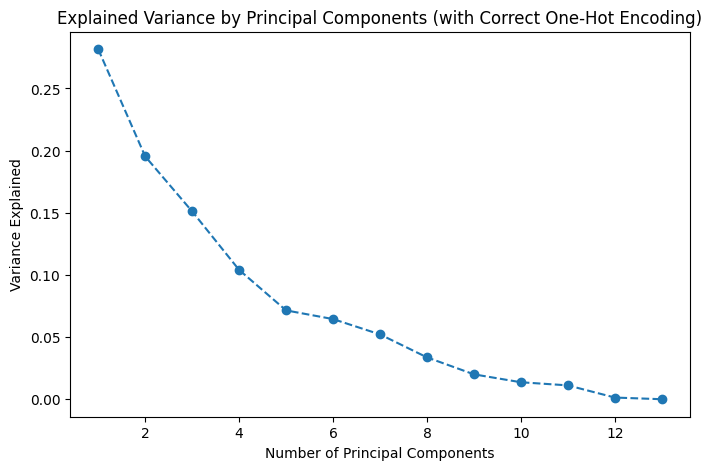

In [92]:


# Checking the one-hot encoding result
encoded_columns = [
    'Hazard_H_FN', 'Hazard_H_HE', 'Hazard_H_MH', 
    'Consequence_C_HD', 'Consequence_C_BW', 'Consequence_C_SR', 'Consequence_C_M',
    'Indicator_I_HP', 'Indicator_I_BW'
]

# Confirming the presence of the expected encoded columns
missing_columns = [col for col in encoded_columns if col not in df.columns]

# If any columns are missing, print them; otherwise, proceed with the PCA
if missing_columns:
    print(f"Missing columns after one-hot encoding: {missing_columns}")
else:
    # Reperform PCA including the expected one-hot encoded columns
    columns_for_pca = ['Welfare_Hazards_Impact', 'Ease_of_Hazard_Mitigation', 'Indicator_Ease', 
                       'Indicator_Resources'] + encoded_columns
    df_scaled = scaler.fit_transform(df[columns_for_pca])

    # Perform PCA
    pca = PCA()
    pca_result = pca.fit_transform(df_scaled)

    # Create a new DataFrame for the PCA results
    pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))])

    # Plot the explained variance
    explained_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.title('Explained Variance by Principal Components (with Correct One-Hot Encoding)')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Variance Explained')
    plt.show()

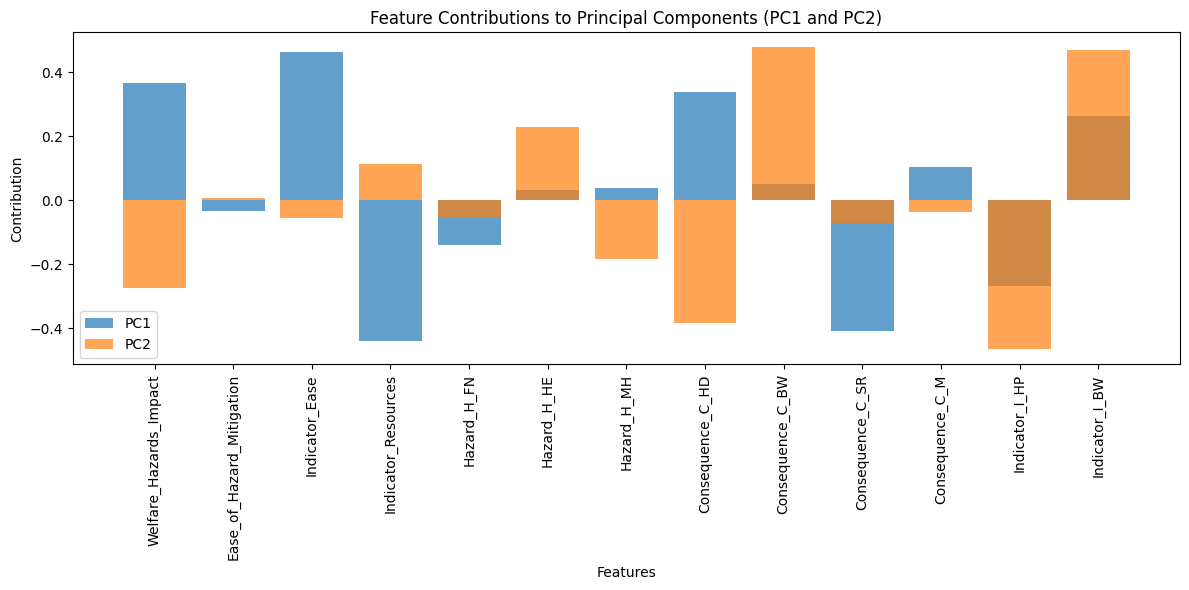

In [93]:
loadings = pd.DataFrame(pca.components_, columns=columns_for_pca, index=[f"PC{i+1}" for i in range(len(pca.explained_variance_ratio_))])

# Visualizing the contributions of features to the first two principal components
plt.figure(figsize=(12, 6))
plt.bar(loadings.columns, loadings.loc['PC1'], alpha=0.7, label='PC1')
plt.bar(loadings.columns, loadings.loc['PC2'], alpha=0.7, label='PC2')
plt.xticks(rotation=90)
plt.title('Feature Contributions to Principal Components (PC1 and PC2)')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.legend()
plt.tight_layout()
plt.show()

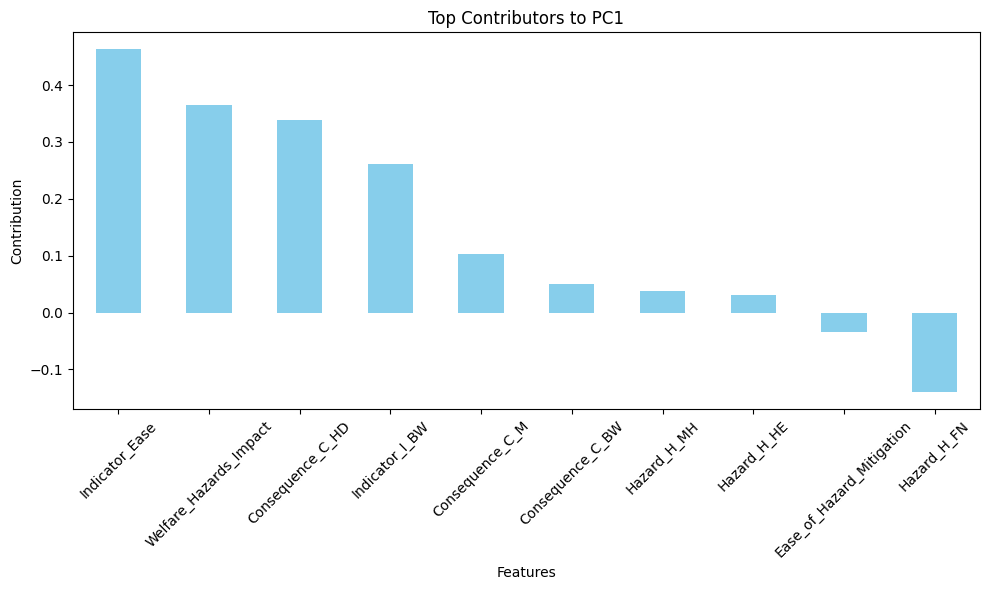

In [95]:
Always show details

Copy code
# Highlighting top contributors for PC1
top_contributors_pc1 = loadings.loc['PC1'].sort_values(ascending=False).head(10)

# Visualizing the top contributors
plt.figure(figsize=(10, 6))
top_contributors_pc1.plot(kind='bar', color='skyblue')
plt.title('Top Contributors to PC1')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

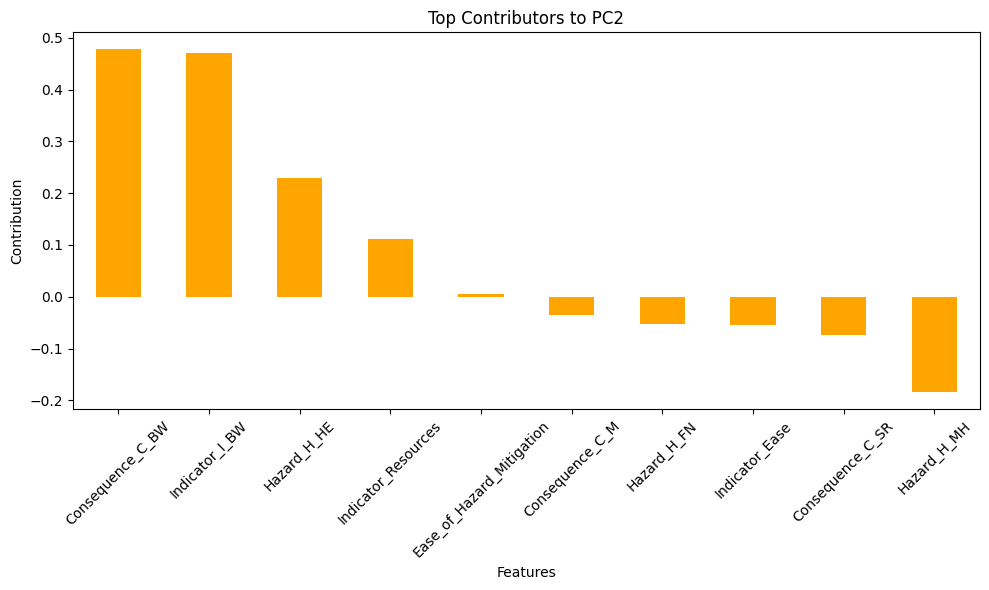

In [99]:
top_contributors_pc2 = loadings.loc['PC2'].sort_values(ascending=False).head(10)

# Visualizing the top contributors
plt.figure(figsize=(10, 6))
top_contributors_pc2.plot(kind='bar', color='orange')
plt.title('Top Contributors to PC2')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

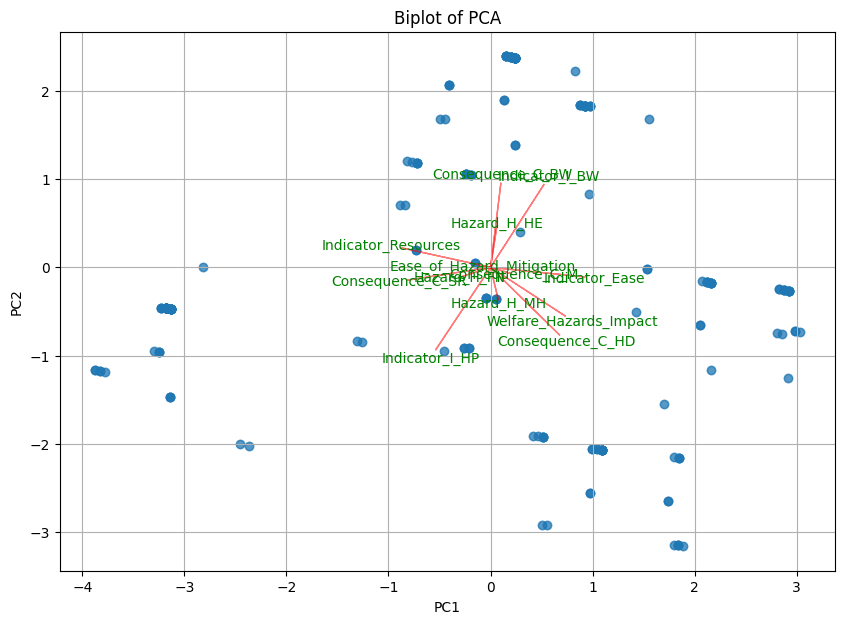

In [100]:
# Function to create a biplot
def biplot(score, coeff, feature_labels, pc1=0, pc2=1):
    plt.figure(figsize=(10, 7))
    plt.scatter(score[:, pc1], score[:, pc2], alpha=0.5)
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i, pc1]*2, coeff[i, pc2]*2, color='red', alpha=0.5)
        plt.text(coeff[i, pc1]*2.2, coeff[i, pc2]*2.2, feature_labels[i], color='green', ha='center', va='center')
    plt.xlabel(f"PC{pc1+1}")
    plt.ylabel(f"PC{pc2+1}")
    plt.grid()
    plt.title('Biplot of PCA')
    plt.show()

# Extracting scores and coefficients for the biplot
scores = pca_result
coefficients = pca.components_.T
feature_labels = columns_for_pca

# Creating the biplot for PC1 and PC2
biplot(scores, coefficients, feature_labels)


In [102]:
# Extracting the loadings for PC1 and PC2
pc1_loadings = loadings.loc['PC1']
pc2_loadings = loadings.loc['PC2']

# Creating a DataFrame to show PC1 and PC2 loadings for all variables
loadings_df = pd.DataFrame({'PC1 Loadings': pc1_loadings, 'PC2 Loadings': pc2_loadings})
loadings_df_sorted = loadings_df.sort_values(by=['PC1 Loadings', 'PC2 Loadings'], ascending=False)
loadings_df_sorted

,PC1 Loadings,PC2 Loadings
Indicator_Ease,0.462782,-0.054501
Welfare_Hazards_Impact,0.365608,-0.275756
Consequence_C_HD,0.338269,-0.383771
Indicator_I_BW,0.261572,0.469566
Consequence_C_M,0.102571,-0.035702
Consequence_C_BW,0.050569,0.477314
Hazard_H_MH,0.037984,-0.183475
Hazard_H_HE,0.030384,0.228806
Ease_of_Hazard_Mitigation,-0.034992,0.006327
Hazard_H_FN,-0.139629,-0.051752


/var/folders/0l/0_k60hjn72g4s56_ff84bnvw0000gn/T/ipykernel_69964/3267090385.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(loadings_df['PC1 Loadings'][i], loadings_df['PC2 Loadings'][i], txt, fontsize=9, ha='right')


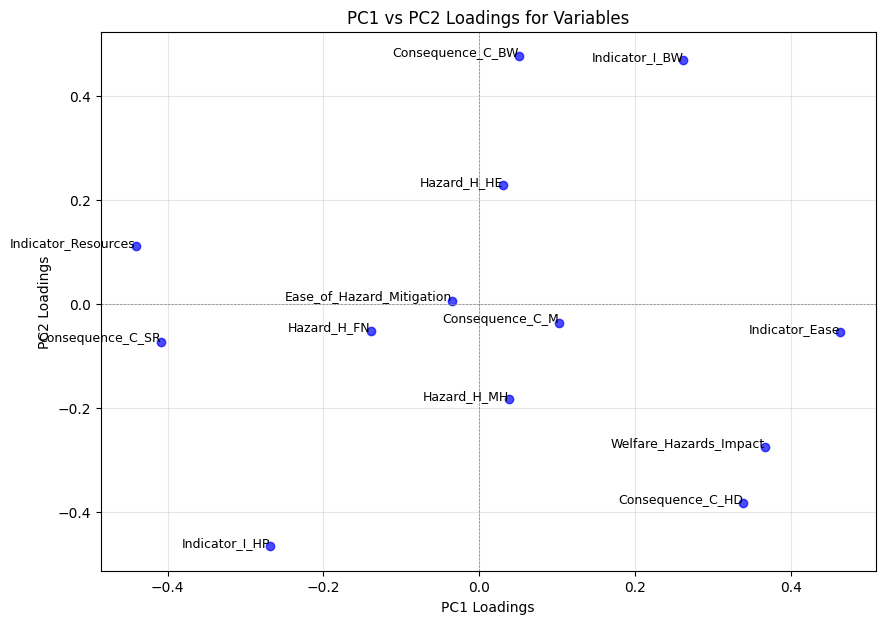

In [103]:
plt.figure(figsize=(10, 7))
plt.scatter(loadings_df['PC1 Loadings'], loadings_df['PC2 Loadings'], color='blue', alpha=0.7)

# Annotating each variable
for i, txt in enumerate(loadings_df.index):
    plt.text(loadings_df['PC1 Loadings'][i], loadings_df['PC2 Loadings'][i], txt, fontsize=9, ha='right')

plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.title('PC1 vs PC2 Loadings for Variables')
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.grid(alpha=0.3)
plt.show()